# 通し課題　DAY1
Theme : Car fuel consumption

■分析のシナリオ

１．必要なライブラリーの読み込み

２．csvデータの読み込みと確認

３．質的データの確認　（今回質的データは目的変数に使用し、説明変数には用いなかった）

４．量的データの確認

５．回帰分析によりCo2排出量を予測してみる

６．ロジスティック回帰によりトランスミッションタイプを予測してみる。

In [3]:
###　１．必要なライブラリーの読み込み

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats
import datetime

■データの説明

量的データ： 
year, euro_standard, engine_capacity, urban_metric, extra_urban_metric,  combined_metric, urban_imperial, extra_urban_imperial, combined_imperial, noise_level, co2, co_emissions, fuel_cost_6000_miles
※metricはメートル法、imperialはマイルで単位が違う

■質的データ： 
manufacturer, model, description, transmission, transmission_type, fuel_type


In [4]:
## データの読込みと確認


# csvデータの読込み
df = pd.read_csv("Car_Fuel_Consumption1.csv")


#データの確認
display(df.head())
df.describe()


,year,manufacturer,model,description,euro_standard,transmission,transmission_type,engine_capacity,fuel_type,urban_metric,...,noise_level,co2,co_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months,date_of_change
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,M5,Manual,1598,Petrol,11.1,...,74.0,195,980.0,NaN,618.0,NaN,NaN,NaN,NaN,NaN
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,M5,Manual,1747,Petrol,11.5,...,74.0,200,1105.0,NaN,633.0,NaN,NaN,NaN,NaN,NaN
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,M5,Manual,1970,Petrol,12.4,...,74.0,210,1103.0,NaN,663.0,NaN,NaN,NaN,NaN,NaN
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,M5,Manual,1598,Petrol,11.3,...,73.0,195,980.0,NaN,626.0,NaN,NaN,NaN,NaN,NaN
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,M5,Manual,1747,Petrol,11.5,...,74.0,200,1105.0,NaN,633.0,NaN,NaN,NaN,NaN,NaN


,year,euro_standard,engine_capacity,urban_metric,extra_urban_metric,combined_metric,urban_imperial,extra_urban_imperial,combined_imperial,noise_level,co2,co_emissions,fuel_cost_12000_miles,fuel_cost_6000_miles,standard_12_months,standard_6_months,first_year_12_months,first_year_6_months
count,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,44838.000000,32754.000000,11926.000000,3517.000000,2926.000000,3517.000000,1419.000000
mean,2007.300950,3.959878,2176.969156,10.464599,6.138122,7.718848,30.504184,49.112755,40.000578,72.136174,189.513114,361.479384,1546.846004,610.821566,165.612738,107.159774,231.558146,78.872093
std,3.813015,0.821962,887.306582,3.913297,1.763877,2.462485,10.612736,12.165625,11.689048,1.827323,55.900954,255.647698,517.194781,178.172832,114.299761,56.606074,264.641858,11.871715
min,2000.000000,2.000000,599.000000,3.100000,2.900000,3.200000,6.800000,5.400000,5.900000,0.200000,79.000000,-200.000000,0.000000,0.000000,0.000000,55.000000,0.000000,66.000000
25%,2004.000000,3.000000,1598.000000,7.700000,4.900000,5.900000,22.800000,40.400000,31.400000,71.000000,150.000000,189.000000,1218.000000,500.000000,100.000000,66.000000,0.000000,66.000000
50%,2008.000000,4.000000,1985.000000,9.800000,5.900000,7.300000,28.800000,47.900000,38.700000,72.000000,180.000000,302.600000,1461.000000,594.000000,135.000000,93.500000,135.000000,74.250000
75%,2011.000000,5.000000,2429.000000,12.400000,7.000000,9.000000,36.700000,57.600000,47.900000,73.300000,219.000000,480.000000,1771.670000,695.000000,215.000000,118.250000,325.000000,93.500000
max,2013.000000,6.000000,8285.000000,41.200000,97.900000,44.000000,91.100000,97.400000,88.300000,83.000000,590.000000,2100.000000,5538.000000,3329.000000,475.000000,261.250000,1030.000000,93.500000


In [5]:
### 質的データの確認

#　質的データの項目数確認
manufacturer_uniq = list(set(df['manufacturer']))
model_uniq = list(set(df['model']))
description_uniq = list(set(df['description']))
transmission_uniq = list(set(df['transmission']))
tType_uniq = list(set(df['transmission_type']))
fuel_uniq = list(set(df['fuel_type']))

print('manufacturer:  ' + str(len(manufacturer_uniq)) + 
      '  model:  ' + str(len(model_uniq)) + 
      '  description:  ' + str(len(description_uniq)) +
      '  transmission:  ' + str(len(transmission_uniq)) +
      '  transmission_type:  ' + str(len(tType_uniq)) +
      '  fuel_type:  ' + str(len(fuel_uniq))
     )


# 質的データの項目とデータカウント数　(ヒストグラム表示は重いので)
main_manuf = df['manufacturer'].value_counts()
fuel_type = df['fuel_type'].value_counts()
transmission_type = df['transmission_type'].value_counts()
print(main_manuf)
print(fuel_type)
print(transmission_type)



#main_manuf.index[0]

manufacturer:  62  model:  2620  description:  14794  transmission:  92  transmission_type:  2  fuel_type:  10
Mercedes-Benz           5630
Vauxhall                4131
Volkswagen              3567
Ford                    2915
Audi                    2841
BMW                     2767
Volvo                   1862
Renault                 1846
Peugeot                 1686
Skoda                   1347
Honda                   1222
Citroen                 1130
Saab                     896
Toyota                   865
Mitsubishi               766
Kia                      721
Seat                     710
Fiat                     698
Nissan                   665
Hyundai                  639
Mazda                    621
Porsche                  606
Chrysler Jeep            602
Subaru                   577
Suzuki                   529
Alfa Romeo               464
Jaguar Cars              453
MG Rover Group           446
Chevrolet                442
Mini                     348
                   

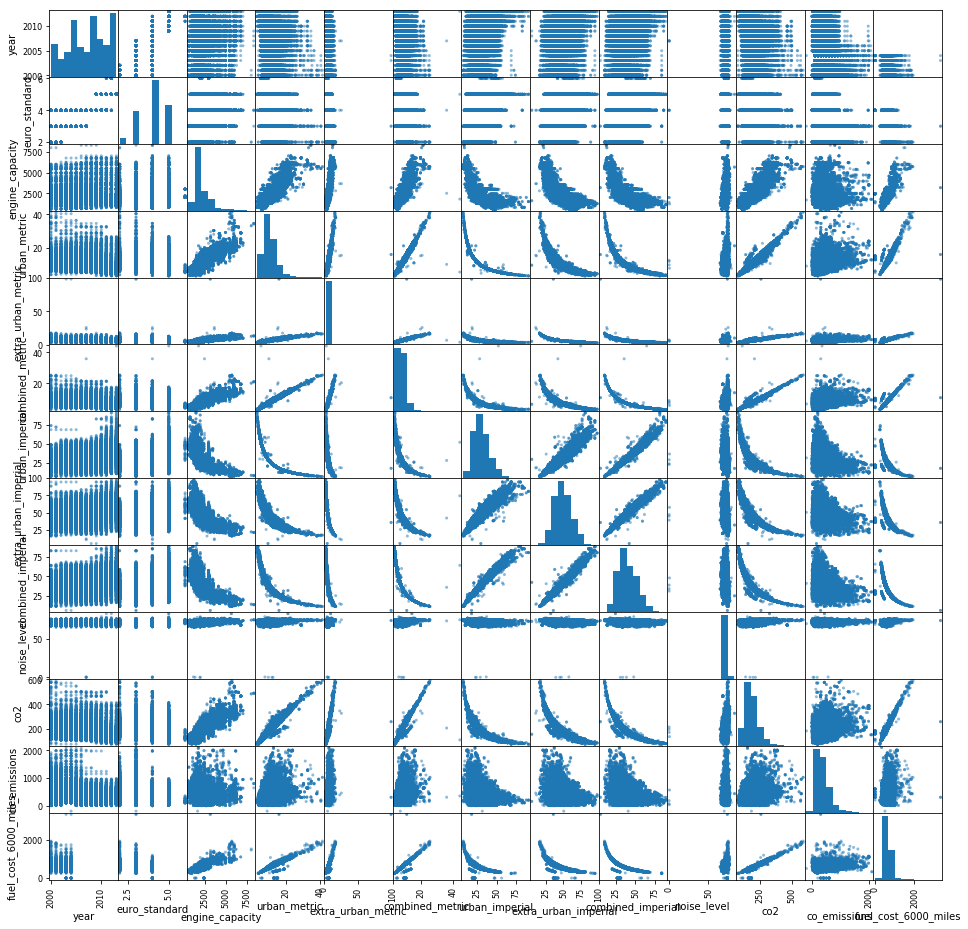

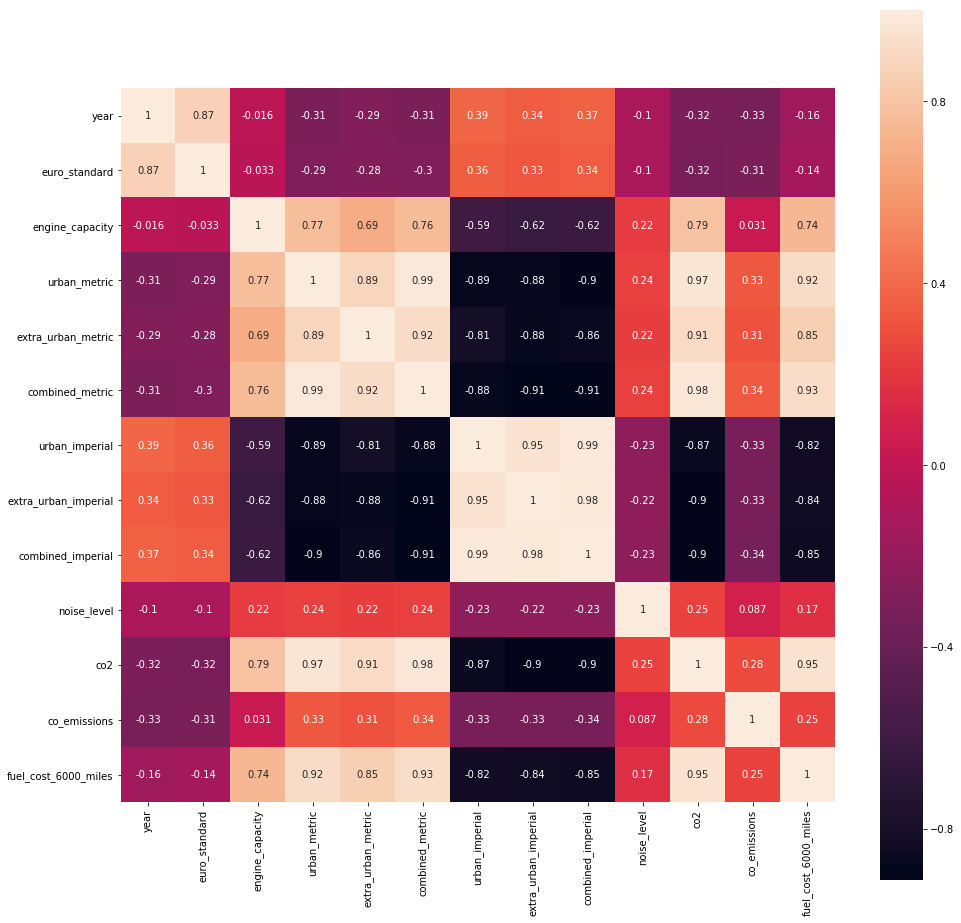

In [6]:
###　量的データの可視化


#　量的データの選択
num_data = df[['year', 'euro_standard', 'engine_capacity', 'urban_metric', 'extra_urban_metric', 'combined_metric', 
               'urban_imperial', 'extra_urban_imperial', 'combined_imperial', 'noise_level', 'co2', 'co_emissions', 'fuel_cost_6000_miles']]

# 散布図
pd.plotting.scatter_matrix(num_data, figsize=(16,16))
plt.show()

# 相関マトリクスヒートマップ
plt.figure(figsize=(16,16))
heatmap = sns.heatmap(num_data.corr(), cbar=True, annot=True, square=True)

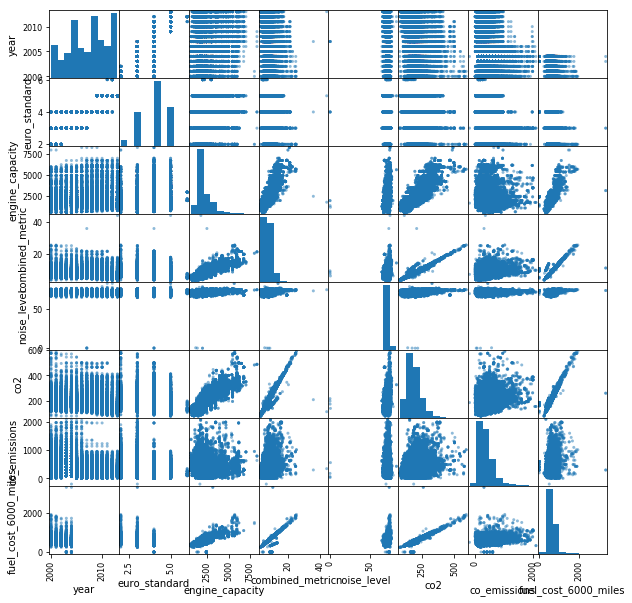

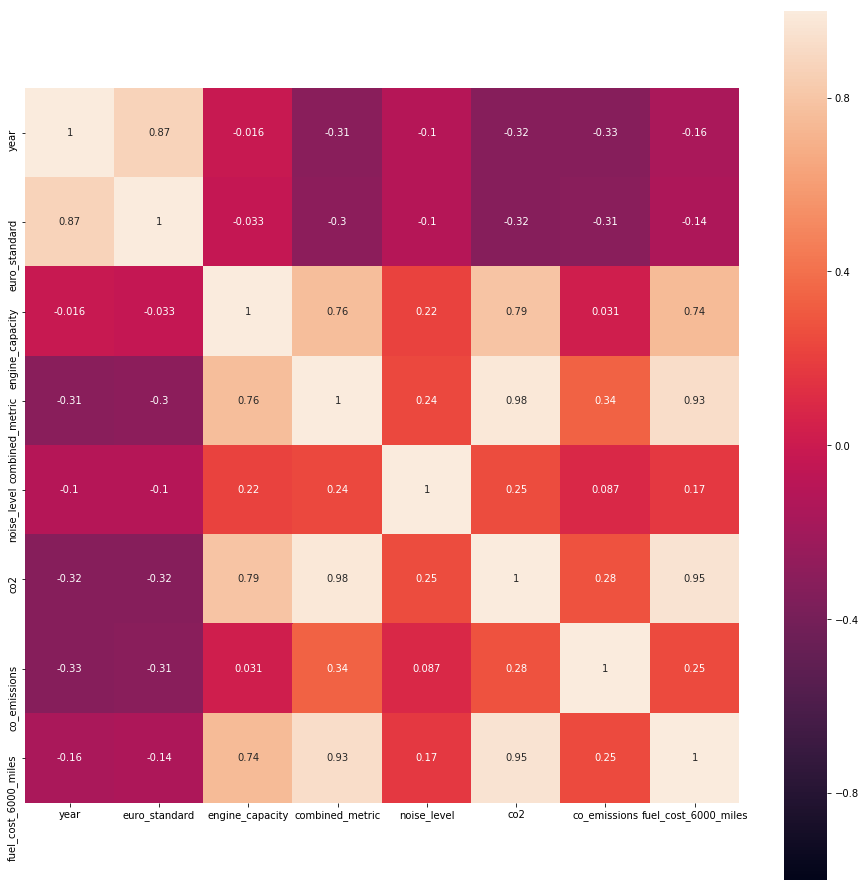

In [7]:
##　量的データの選別
# urban,extra-urbanおよびconbine、metircとimperialはそれぞれ相関が高いのでcombined_metricに絞る　
# ⇒　相関が高いということは代表的なパラメータで説明できるということ。
num_data2 = df[['year', 'euro_standard', 'engine_capacity', 'combined_metric', 
               'noise_level', 'co2', 'co_emissions', 'fuel_cost_6000_miles']]

# 散布図
pd.plotting.scatter_matrix(num_data2, figsize=(10,10))
plt.show()

# 相関マトリクスヒートマップ
plt.figure(figsize=(16,16))
heatmap = sns.heatmap(num_data2.corr(), cbar=True, annot=True, square=True,
                      vmin=-1.0, vmax=1.0)

■目的変数と説明変数の設定
　
 
 １．回帰分析：
  目的変数：Co2の排出量
  説明変数：engine_capacity, combined_metric, year
 
 ２．ロジスティック回帰：
  目的変数：transmission type
  説明変数：量的変数全部 
 

In [8]:
###　Co2の排出量を回帰分析により予測してみる！！！
#　目的変数：Co2、　説明変数：engine_capacity, combined_metric, year

# 係数を求める
y = df["co2"].values                                              #目的変数
X = df[['engine_capacity', 'combined_metric', 'year']].values     #説明変数
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
# w4 = regr.coef_[3]
# w5 = regr.coef_[4]
# w6 = regr.coef_[5]

#　説明変数定義
x1 = df['engine_capacity'].values
x2 = df['combined_metric'].values
x3 = df['year'].values
# x4 = df['yr_built'].values
# x5 = df['sqft_living15'].values
# x6 = df['sqft_lot15'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 1667.568, w1 = 0.009, w2 = 19.267, w3 = -0.820
二乗誤差 = 2552707.448


In [9]:
##　回帰分析2：説明変数を標準化してみる


# 係数を求める
y = df["co2"].values
X = df[['engine_capacity', 'combined_metric', 'year']].values
X = scipy.stats.zscore(X)            # scipyによる標準化
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
# w4 = regr.coef_[3]
# w5 = regr.coef_[4]
# w6 = regr.coef_[5]

#　説明変数定義
x1 = df['engine_capacity'].values
x2 = df['combined_metric'].values
x3 = df['year'].values
# x4 = df['yr_built'].values
# x5 = df['sqft_living15'].values
# x6 = df['sqft_lot15'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}'.format(w0, w1, w2, w3))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 189.513, w1 = 8.178, w2 = 47.445, w3 = -3.128
二乗誤差 = 4363956292788.546


In [10]:
##　トランスミッションタイプをロジスティック回帰により予測してみる！！！
#　目的変数：Manual type、　説明変数：year, euro_standard, engine_capacity, combined_metric, noise_level, co2, co_emissions


# ロジスティック回帰用のデータ配列作成

df['transmission_type'] = df['transmission_type'] == 'Manual'
# Manual = 1, Automatic = 0

y = df['transmission_type']                                                 #目的変数
X = df[['year', 'euro_standard', 'engine_capacity', 'combined_metric', 
               'noise_level', 'co2', 'co_emissions']]                       #説明変数




In [11]:
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]
w5 = clf.coef_[0, 4]
w6 = clf.coef_[0, 5]
w7 = clf.coef_[0, 6]
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}, w7 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6,w7))

C:\Users\QD457275\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


w0 = 1.430, w1 = -2.481, w2 = -481.559, w3 = 0.140, w4 = -333.768, w5 = 114.787, w6 = 4.383, w7 = 0.450


In [12]:
#ロジスティック回帰の予測精度

# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -11.079
正答率 = 67.925%


In [13]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = Manual', '正解 = Automatic'], 
                        columns=['予測 = Manual', '予測 = Automatic'])
conf_mat

,予測 = Manual,予測 = Automatic
正解 = Manual,11053,7131
正解 = Automatic,7251,19403
